In [1]:
import pandas as pd
import networkx as nx
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('asoiaf-all-edges.csv')
df=df[(df['Source'] == 'Cersei-Lannister') | (df['Source'] == 'Jaime-Lannister') | (df['Source'] =='Jon-Snow') | (df['Source'] =='Arya-Stark') | (df['Source'] =='Daenerys-Targaryen') ]

In [4]:
def node_group(x):
    if x=='Cersei-Lannister':
        return 'Group1'
    elif x=='Jaime-Lannister':
        return 'Group2'
    elif x=='Jon-Snow':
        return 'Group3'
    elif x=='Arya-Stark':
        return 'Group4'
    else:
        return 'Group5'

In [5]:
df['group']=df['Source'].apply(node_group)
df['group']=pd.Categorical(df['group'])
#df['group'].cat.codes
df['distance']=100-df['weight']

In [6]:
edges=[]
nodes1=df['Source'].unique().tolist()
nodes2=df['Target'].unique().tolist()
nodes=[]
nodes=[node for node in nodes1 and nodes2 if node not in nodes]

In [7]:
for i in range(len(df['Source'])):
    edge=[df['Source'].iloc[i],df['Target'].iloc[i],df['distance'].iloc[i]]
    edges.append(edge)

In [8]:
G_C=nx.Graph()
G_C.add_nodes_from(nodes)
for e in edges:
    G_C.add_edge(e[0],e[1],distance=e[2])

In [9]:
pos = nx.spring_layout(G_C)
labels = {}    
for node in G_C.nodes():
    if node in nodes1:
        labels[node] = node

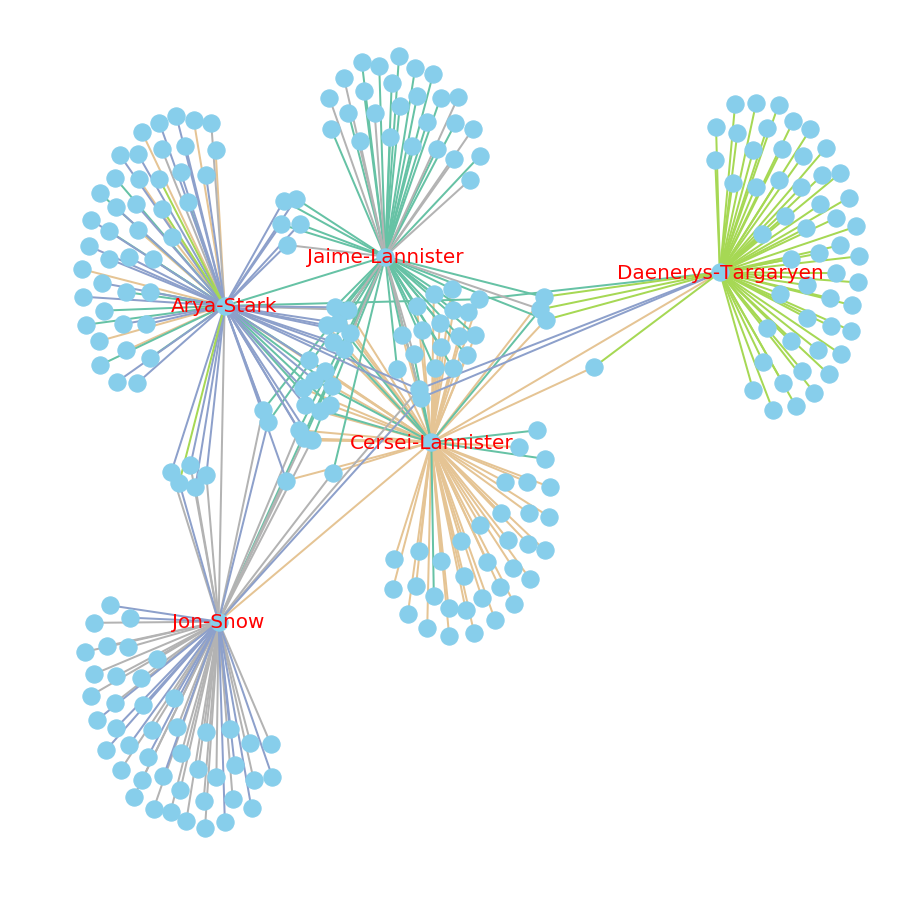

In [10]:
fig=plt.figure(1,figsize=(12,12))
nx.draw(G_C, pos,labels=labels,font_size=20,font_color='r',node_color='skyblue', node_size=300, 
        edge_color=df['group'].cat.codes, 
        width=2.0, 
        edge_cmap=plt.cm.Set2)
plt.show()